### 软间隔支持向量可视化结果

[[3.  5. ]
 [1.5 6. ]
 [1.  5. ]
 [3.  2. ]]
[[-0.18630137 -0.56986301]]
[2.69863014]


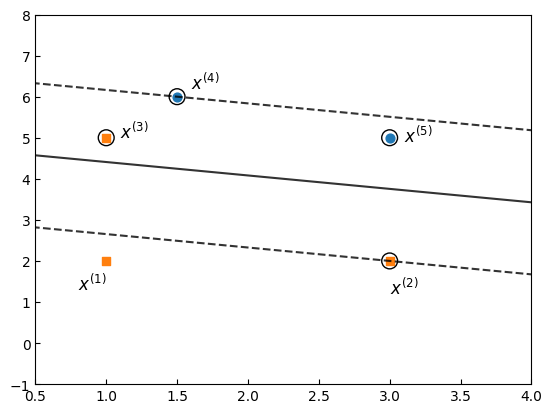

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def decision_boundary():
    # 构造数据

    X = np.array([[5, 1], [0, 2], [1, 5], [3, 2], [1, 2], [3, 5], [1.5, 6], [4.5, 6], [0, 7]])
    y = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0])
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.annotate(r'$x^{(1)}$', xy=(0.8, 1.3), fontsize=12,)
    plt.annotate(r'$x^{(2)}$', xy=(3, 1.2), fontsize=12,)
    plt.annotate(r'$x^{(3)}$', xy=(1.1, 5), fontsize=12,)
    plt.annotate(r'$x^{(5)}$', xy=(3.1, 4.9), fontsize=12,)
    plt.annotate(r'$x^{(4)}$', xy=(1.6, 6.2), fontsize=12,)

    xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
    ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    data = []
    for i in range(len(X)):
        index = np.where(y == i)[0]
        data.append(X[index, :])

    # plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.scatter(data[0][:, 0], data[0][:, 1], marker='o', s=40)
    plt.scatter(data[1][:, 0], data[1][:, 1], marker='s', s=40)
    clf = svm.SVC(kernel='linear', C=.2)
    clf.fit(X, y)

    print(clf.support_vectors_)
    print(clf.coef_)
    print(clf.intercept_)

    Z4 = clf.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z4, colors='black', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=130,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.xlim(0.5, 4)
    plt.ylim(-1, 8)
    plt.show()


if __name__ == '__main__':
    decision_boundary()

